**McDonals Case Study**

Importing Libraries

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


Loading Dataset

In [120]:
df=pd.read_csv('/content/McDonalds Case Study-20250502T103117Z-1-001.zip')

In [121]:
df.head(6)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,+2,55,Every three months,Male


In [127]:
df.size

21795

In [123]:
df.shape

(1453, 15)

checking whether there is null values

In [128]:
df.isnull()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1449,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1450,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1451,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
#calculating total null values
df.isnull().sum()

,0
yummy,0
convenient,0
spicy,0
fattening,0
greasy,0
fast,0
cheap,0
tasty,0
expensive,0
healthy,0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [131]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

Converting categorical values into numerical

In [160]:
#converting categorical values into numerical values
df.replace({'Yes':1, 'No':0}, inplace=True)

In [161]:
df.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [177]:

df["yummy"]= df["yummy"].replace({'Yes':1, 'No':0})
df["convenient"] = df["convenient"].replace({'Yes':1, 'No':0})
df["spicy"] = df["spicy"].replace({'Yes':1, 'No':0})
df["fattening"] = df["fattening"].replace({'Yes':1, 'No':0})
df["greasy"] = df["greasy"].replace({'Yes':1, 'No':0})
df["fast"] = df["fast"].replace({'Yes':1, 'No':0})
df["cheap"] = df["cheap"].replace({'Yes':1, 'No':0})
df["tasty"] = df["tasty"].replace({'Yes':1, 'No':0})
df["expensive"] = df["expensive"].replace({'Yes':1, 'No':0})
df["healthy"] = df["healthy"].replace({'Yes':1, 'No':0})
df["disgusting"] = df["disgusting"].replace({'Yes':1, 'No':0})



Describing our dataset

In [178]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Age,VisitFrequency
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.0
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,44.604955,0.0
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,14.221178,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.0
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.0
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,45.000000,0.0
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,57.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.000000,0.0


In [212]:
df1= df.iloc[:, 0:11]

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


Data Visualization

<Axes: ylabel='count'>

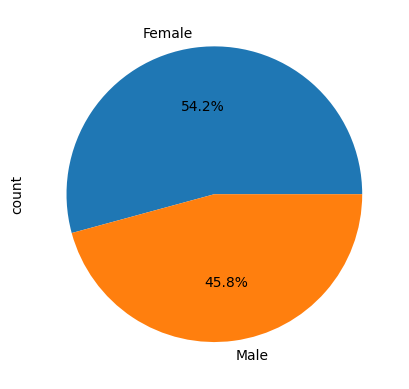

In [214]:
#visualizing using piechart
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: >

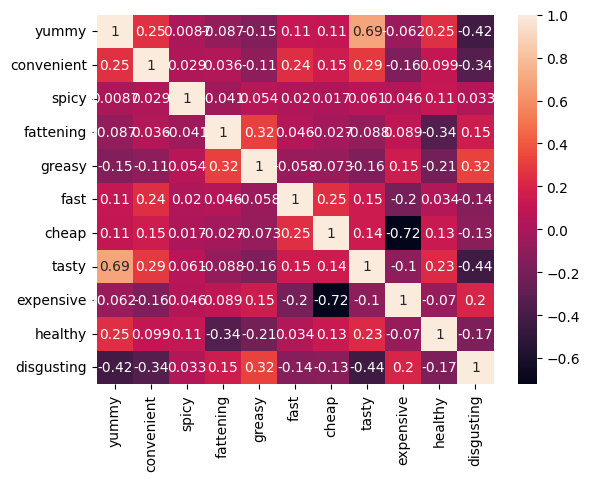

In [216]:
sns.heatmap(df1.corr(), annot=True)


<Axes: xlabel='Age', ylabel='count'>

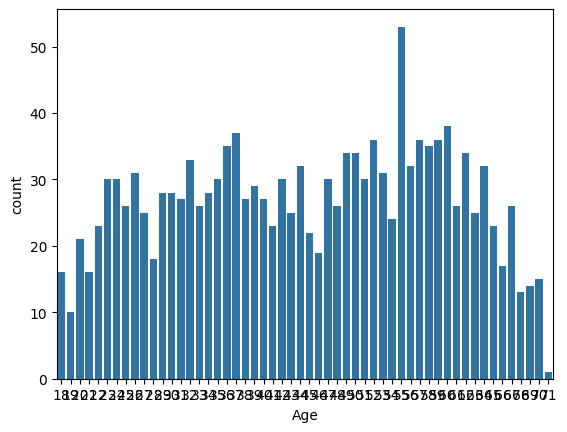

In [215]:
#visulazing using barplot
sns.countplot(x='Age', data=df)

Histogram of each attribute

Principal Component Analysis

In [217]:
#standardising the data
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
df_scaled= scalar.fit_transform(df1)

In [220]:
#calculating pca
from sklearn.decomposition import PCA
pca= PCA(n_components=11)
df_pca= pca.fit_transform(df_scaled)
# Assign the result of PCA transformation to principal_components
principal_components = df_pca
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11"])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144


<Axes: xlabel='PCA2', ylabel='PCA3'>

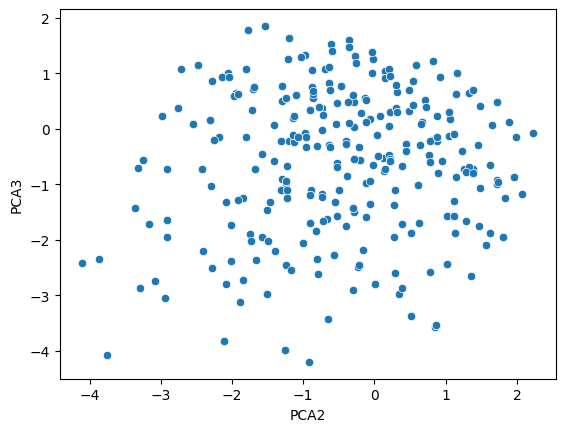

In [242]:
#comparing pca1 and pca2
sns.scatterplot(x="PCA2", y="PCA3", data=pca_df)

In [243]:
X = df.drop(columns='VisitFrequency', axis=1)
Y = df['VisitFrequency']

<Axes: >

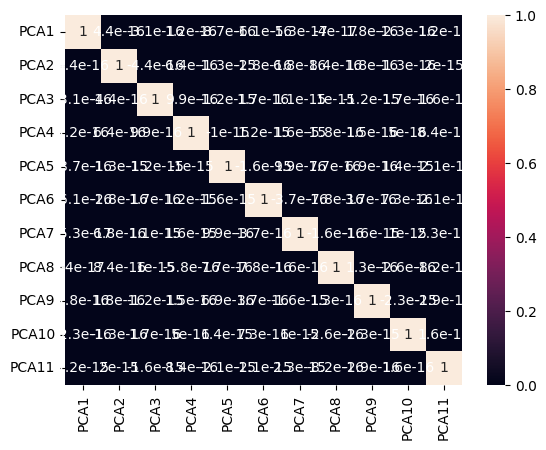

In [244]:
#visualising pca using heatmap
sns.heatmap(pca_df.corr(), annot=True)

Extracting Segments


Using K-Means

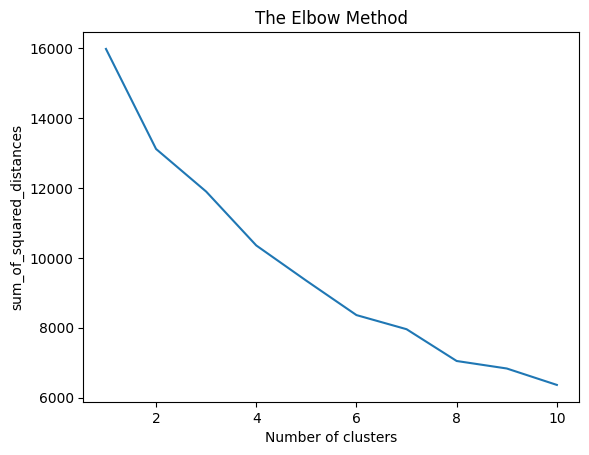

In [245]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(pca_df)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1,11), sum_of_squared_distances)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('sum_of_squared_distances')
plt.show()

In [276]:
kmeans_model=KMeans(3)
kmeans_model.fit_predict(df_scaled)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [277]:
pca_df_kmeans.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,cluster
0,-0.704334,0.437016,-0.268698,-0.872074,1.521184,-0.470160,0.030969,0.687116,-0.367598,-0.321161,1.701170,1
1,0.467820,-0.364277,1.596835,-0.004835,-0.462385,0.449321,-0.087351,-0.446003,-0.221855,-0.191268,1.467681,1
2,-0.191986,-1.712949,0.339413,3.368168,1.266802,-0.148058,0.606634,0.668576,-1.377226,1.259300,-0.128530,1
3,0.116991,1.155122,1.003913,0.469589,-1.141750,0.857182,-0.015843,-0.390275,1.578539,-0.092189,-0.233201,1
4,0.034724,1.390267,-0.792275,0.473031,0.270488,0.847963,1.804085,0.700019,-1.630339,-0.092449,-0.033144,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

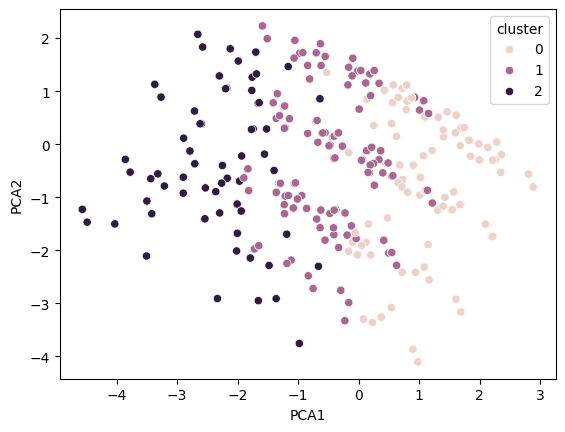

In [278]:
#visualizing using scatterplot
sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans)

Create a target column to store cluster segment

In [363]:
#creating a target column to store cluster segment
df['cluster']=kmeans_model.labels_
kmeans_model.fit_predict(df_scaled)
pca_df_kmeans= pd.concat([df1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
pca_df_kmeans.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1
3,1,1,0,1,1,1,1,1,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,2


Grouping segments

Grouping with cluster1

In [364]:
#grouping with cluster1
cluster1=df[df['cluster']==0]
cluster1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,3,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,1,Male,0
6,1,1,1,1,0,1,0,1,1,1,0,+2,56,3,Female,0
13,1,1,0,1,0,1,0,1,1,1,0,I love it!+5,54,3,Male,0
17,1,1,0,0,1,1,0,1,0,0,0,+2,31,0,Male,0


Visualsing cluster1


<ipython-input-287-651772589089>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  n= sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


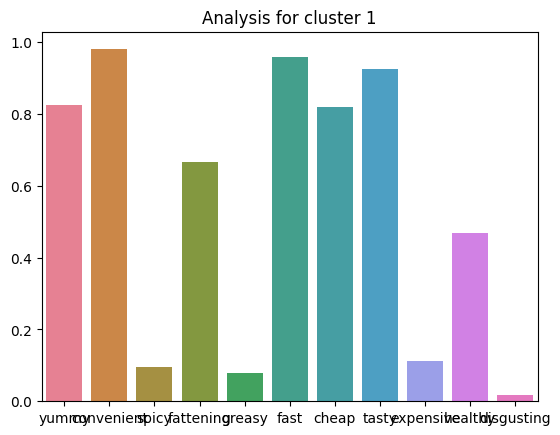

In [287]:
#visualising using barplot
n= sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis for cluster 1')
plt.show()


Similarly grouping with cluster 2

In [365]:
cluster_2_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_2_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,1
18,0,0,0,1,1,1,1,0,1,0,1,1
38,0,0,0,1,1,1,1,0,0,0,1,1
39,0,0,0,1,1,1,0,0,1,0,1,1
40,1,0,0,1,0,0,0,1,1,0,0,1


Visualising cluster 2

<ipython-input-366-142a6be455d8>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  n = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


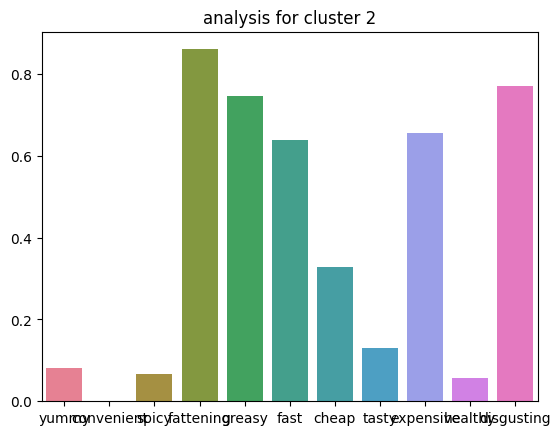

In [366]:
n = sns.barplot(data=cluster_2_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 2')
plt.show()


similarly grouping with cluster 3


In [367]:
cluster_3_df = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster_3_df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,1
18,0,0,0,1,1,1,1,0,1,0,1,1
38,0,0,0,1,1,1,1,0,0,0,1,1
39,0,0,0,1,1,1,0,0,1,0,1,1
40,1,0,0,1,0,0,0,1,1,0,0,1


Visualising cluster3

<ipython-input-368-35ae82533adb>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  n = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


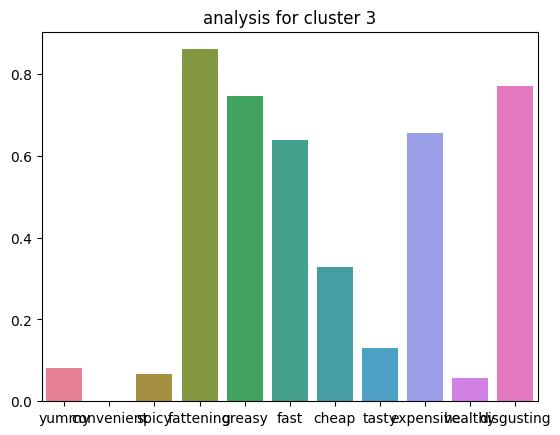

In [368]:
n = sns.barplot(data=cluster_3_df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('analysis for cluster 3')
plt.show()


Traning and testing data

In [413]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,3,0,1,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,3,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,1,1,0,2


In [414]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)
df_new.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,1,0,1,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,3,0,1,1
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,3,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,0,0,1,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,1,1,0,2


In [415]:
from sklearn.model_selection import train_test_split

X = df_new.drop(['cluster'],axis=1)
y= df_new[['cluster']]

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3)

In [416]:
X_test

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
583,1,1,0,1,1,1,0,1,1,0,0,-2,36,3,1
101,1,1,0,1,1,1,0,1,1,0,0,+2,42,3,0
45,1,1,1,1,1,1,1,1,1,1,1,+2,36,0,1
768,0,1,0,1,0,1,0,0,0,0,1,I hate it!-5,58,2,0
548,1,1,0,1,1,1,1,1,1,0,0,+4,32,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,1,1,0,1,1,0,1,1,0,0,0,+3,26,0,1
685,1,1,0,1,1,1,0,0,1,0,0,+3,39,3,1
1108,0,0,0,1,1,0,0,0,1,0,1,I hate it!-5,66,2,1
564,0,1,0,1,1,0,0,0,1,0,1,-3,48,2,1


In [417]:
X_train

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
738,0,1,0,1,0,1,1,0,0,0,0,+2,48,1,1
1091,1,1,0,0,0,1,0,1,0,1,0,+3,42,0,0
1109,1,1,0,1,0,0,1,0,0,1,0,+4,51,0,1
407,1,1,1,1,1,1,0,1,1,0,0,+1,60,3,1
1276,0,1,1,1,1,1,1,0,0,0,1,I hate it!-5,65,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,1,1,0,1,0,1,0,1,1,0,0,+3,59,3,1
944,0,1,0,1,0,1,1,1,0,0,0,+2,50,1,0
950,0,1,0,1,0,1,1,0,0,0,0,+1,26,1,1
87,0,1,0,1,1,0,0,1,1,0,0,I hate it!-5,50,3,0


In [419]:
y_test

,cluster,cluster
583,1,1
101,1,1
45,0,2
768,2,0
548,1,1
...,...,...
587,1,2
685,1,1
1108,2,0
564,2,0


In [420]:
y_train

,cluster,cluster
738,1,2
1091,0,2
1109,0,2
407,1,1
1276,2,0
...,...,...
1235,1,1
944,1,2
950,1,2
87,2,1


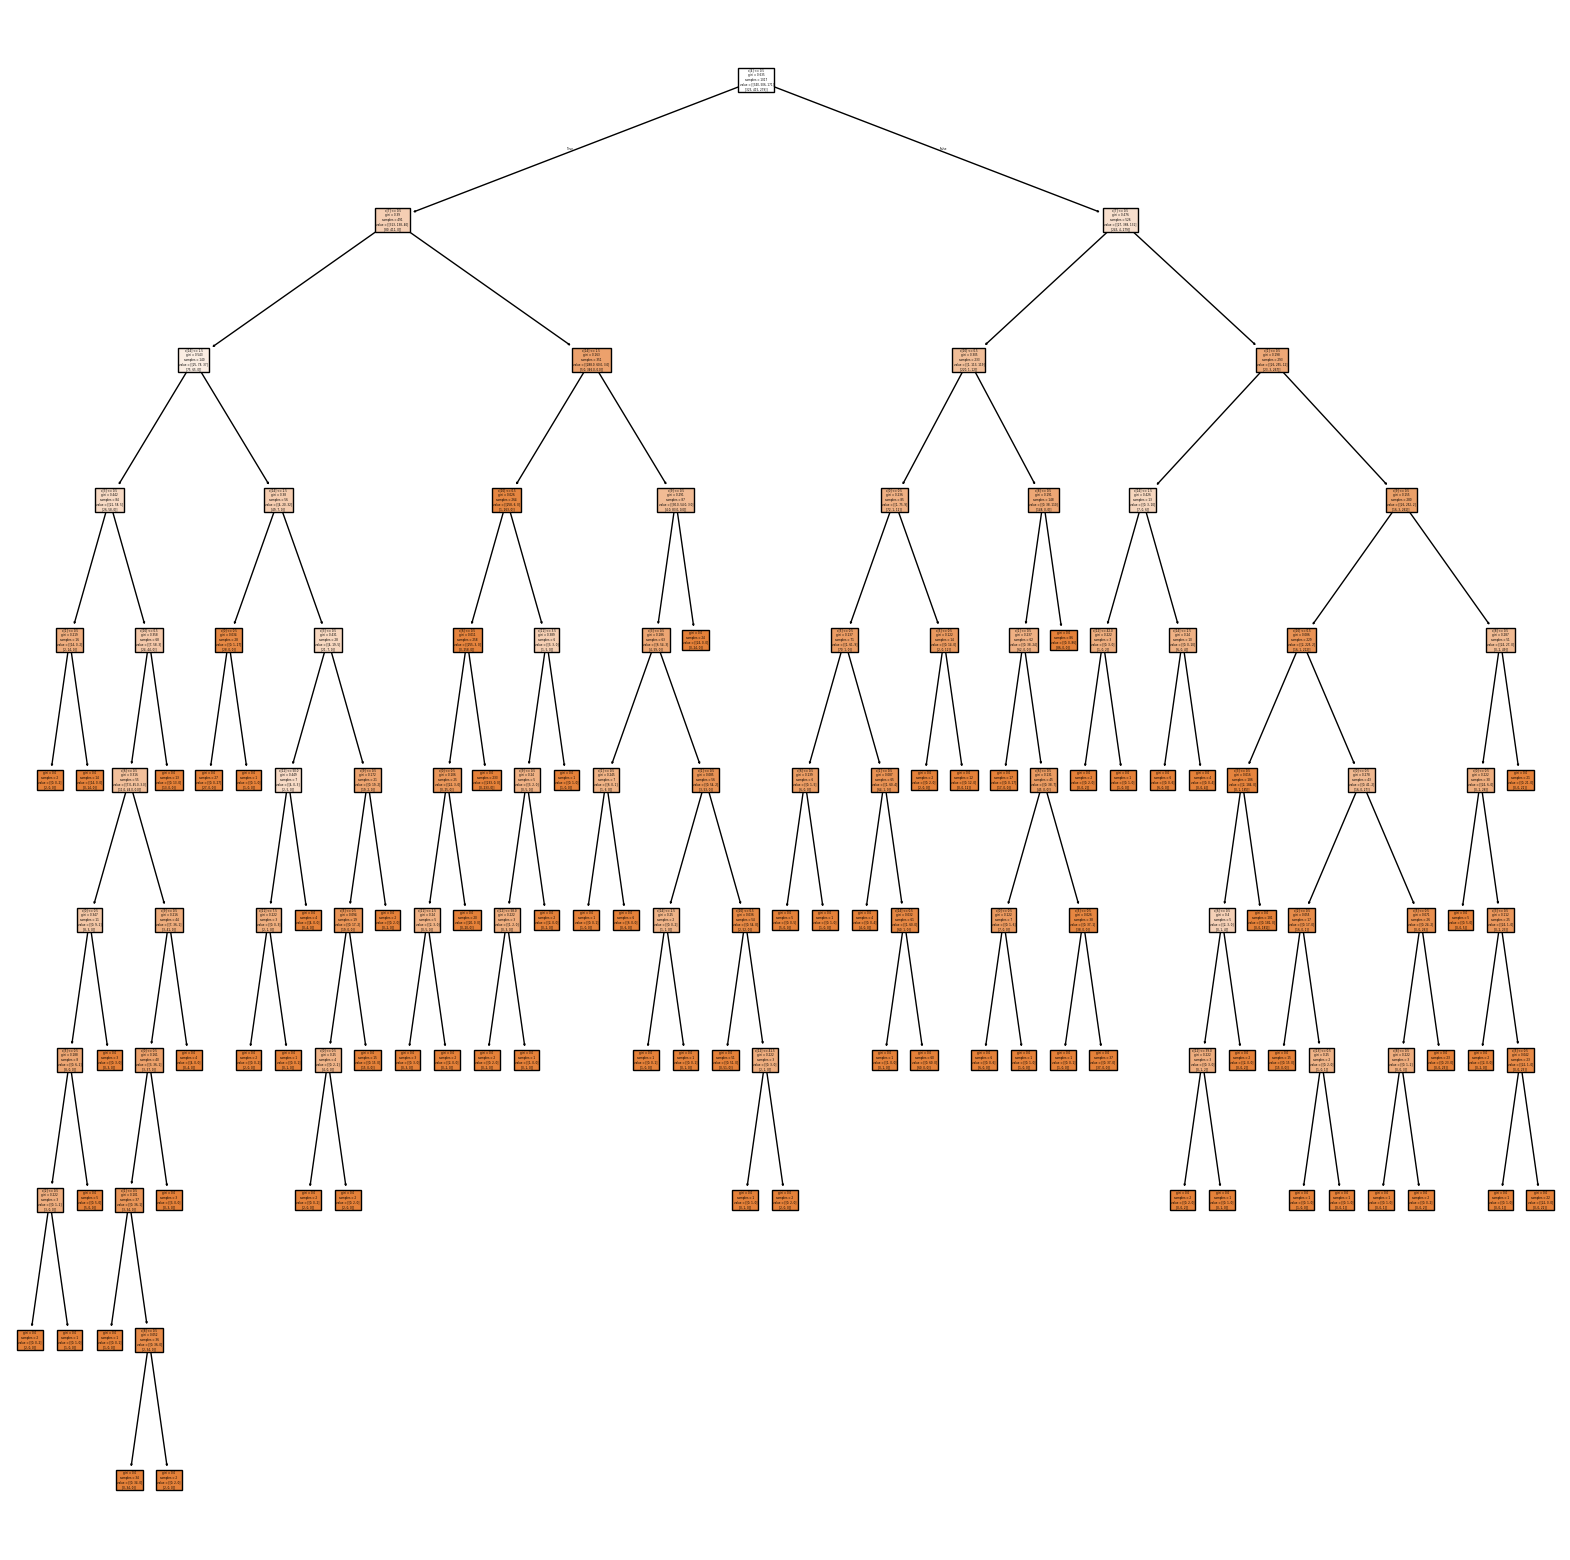

In [421]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
_ = tree.plot_tree(ml, filled=True)


In [422]:
#selecting the target segments
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster,VisitFrequency
0,0,0.707463
1,1,1.378492
2,2,2.099502


<Axes: xlabel='cluster', ylabel='VisitFrequency'>

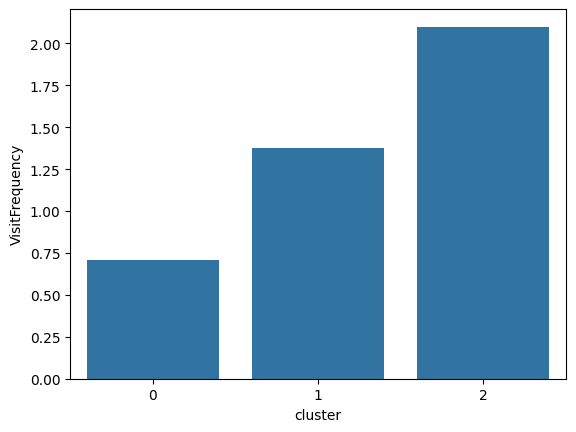

In [423]:
#visualing target segments
sns.barplot(x='cluster', y='VisitFrequency', data=visit)
